In [4]:
import sys
##sys.path.append('/feynman/home/dap/lceg/rp269101/.local/lib/python3.6/site-packages')
##sys.path.append('/usr/lib64/python3.6/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from random import randint
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from scipy.special import erfc,erf
#from mpmath import erf
import dask
from scipy.integrate import simps
pd.options.mode.chained_assignment = None
from astropy.cosmology import FlatLambdaCDM
import functools
import os
from astropy.cosmology import z_at_value
import astropy.units as u
import random
p = 0.01  

In [18]:
@vectorize(excluded)
def f(x1,x2):
    if x2 >= 1:
        return x1 + 10*x2
    elif x2 < 1:
        return x1

NameError: name 'vectorize' is not defined

In [10]:
print(f(0.5,np.arange(0,10,1)))

[ 0.5 10.5 20.5 30.5 40.5 50.5 60.5 70.5 80.5 90.5]


In [105]:
## CMASS parameter
logMmin = 13.08
logM1 = 14.00
logM0 = 13.077
sigmalog = 0.596
alpha = 1.0127
Mmin = 10**logMmin
M1 = 10**logM1
M0 = 10**logM0


#ELG parameter
Ac = 0.00537
As = 0.005301
mu = 11.515
logM0e = mu - 0.05
logM1e = mu + 0.35
M0e = 10**logM0e
M1e = 10**logM1e
sigmae = 0.08
alphae = 0.9
gammae = -1.4

def HOD_centrals(M):
    Ncen = (1./2.)*(1 + erf(np.log(M/Mmin)/sigmalog))
    return Ncen

def HOD_sattelite(M):
    if (M > M0):
        Ncen = HOD_centrals(M)
        Nsat=Ncen*((M - M0)/M1)**(alpha)
    else :
        Nsat=0.0
    return Nsat

def HOD_central_ELG(M):
    x = np.log10(M)
    if (x < mu):
        Ncen = Ac/(np.sqrt(2*np.pi)*sigmae)*np.exp(-((x - mu)**2)/(2*sigmae**2))
    else:
        Ncen= Ac/(np.sqrt(2*np.pi)*sigmae)*(M/(10**mu))**(gammae)

    return Ncen


def HOD_sattelite_ELG(M):
    if (M > M0e):
        Nsat=As*((M - M0e)/M1e)**(alphae)
    else :
        Nsat=0.0
    return Nsat





def random_sample(side):
    return np.random.uniform(side)




HOD_sattelitev = np.vectorize(HOD_sattelite)
HOD_sattelite_ELGv = np.vectorize(HOD_sattelite_ELG)
HOD_central_ELGv = np.vectorize(HOD_central_ELG)




def load_data(filename):
    #df = dd.read_parquet(filename)
    df = pd.read_parquet(filename)
    return df


def func_tomap(x,y,dfg,dfgS):
    dfi = dfgS.loc[dfgS.M200P == x]
    size = dfi.M200P.size
    index = dfi.index.values
    if ((y >= 1) & (y < size)): 
        np.random.shuffle(index)
        indices = index[0:size]
        dfi = dfi.loc[indices]
        dfg = pd.concat([dfg, dfi])
    elif (Ns[i] > size):
        dfg = pd.concat([dfg,dfi])
    del dfi
    
    

In [3]:
df = load_data('/Volumes/LaCie/lightcone2_wide/dmsdens_1150.0.2.parquet')
df = df[df.M200C > 6e10]
dfm= df[df.PID == -1]
dfs = df[df.PID != -1]
dfm = dfm.rename(columns={"M200C": "M200P", "ID":"IDp"}) 
dfm['M200C'] = dfm['M200P']
dfm = dfm.drop(columns=['RS','PID','X','Y','Z'])
dfs = dfs.drop(columns=['RS','X','Y','Z'])
dfm2 = dfm.copy()
dfm2 = dfm2.drop(columns=['RA','M200C','DEC','RVIR','Rcom','VX','VY','VZ','VMAX'])
dfs = dfs.rename(columns={"PID":"IDp"})
dft = dd.merge(dfm2,dfs,on="IDp")

dft = dft.reset_index(drop=True)
dfm = dfm.reset_index(drop=True)
dft = dft.sort_values(by=['M200P'],ignore_index=True)
dfm['ID'] = dfm['IDp']


dft = dft[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
dfm = dfm[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]

#childs = dft.loc[~cond1]
dfm = dfm.compute()
dft = dft.compute()


KeyboardInterrupt: 

In [ ]:
cond1 = dft.M200C > dft.M200P
parents = dft.loc[cond1]
M200C = parents.M200C.values
M200P = parents.M200P.values
ID = parents.ID.values
IDp = parents.IDp.values

cond = np.isin(dfm.IDp,IDp)

In [ ]:
np.arange(0,10)

In [ ]:
print(parents.shape)

In [ ]:
print(dft.IDp[cond].shape)

In [ ]:
print(cond.shape)
print(dft.shape)

In [ ]:
print(parents.shape)

In [ ]:
print(cond)

In [ ]:
cond = np.isin(dfm.IDp,IDp)
dfm.loc[cond,'M200P']= M200C
dfm.loc[cond,'IDp']= ID
    

In [ ]:
import os

In [ ]:
print(files[0])

In [16]:
dfg = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])


df = load_data('/Volumes/LaCie/lightcone2_wide/dmsdens_1150.0.2.parquet')

dfgC = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
dfgS = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])

df = df[df.M200C > 6e10]
dfm= df[df.PID == -1]
dfs = df[df.PID != -1]
dfm = dfm.rename(columns={"M200C": "M200P", "ID":"IDp"}) 
dfm['M200C'] = dfm['M200P']
dfm = dfm.drop(columns=['RS','PID','X','Y','Z'])
dfs = dfs.drop(columns=['RS','X','Y','Z'])
dfm2 = dfm.copy()
dfm2 = dfm2.drop(columns=['RA','M200C','DEC','RVIR','Rcom','VX','VY','VZ','VMAX'])
dfs = dfs.rename(columns={"PID":"IDp"})
dft = dd.merge(dfm2,dfs,on="IDp")

dft = dft.reset_index(drop=True)
dfm = dfm.reset_index(drop=True)
dft = dft.sort_values(by=['M200P'],ignore_index=True)
dfm['ID'] = dfm['IDp']


dft = dft[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
dfm = dfm[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]

#childs = dft.loc[~cond1]
dfm = dfm.compute()
dft = dft.compute()



cond1 = dft.M200C > dft.M200P
parents = dft.loc[cond1]
M200C = parents.M200C.values
M200P = parents.M200P.values
ID = parents.ID.values
IDp = parents.IDp.values

cond = np.isin(dfm.IDp,IDp)
dfm.loc[cond,'M200P']= M200C
dfm.loc[cond,'IDp']= ID
    
cond = (dfm.M200P == dfm.M200C) & (dfm.IDp == dfm.ID)
parents1 = dfm.loc[cond]
childs1 = dfm.loc[~cond]


cond = np.isin(dft.IDp,IDp)
M200in = dft.M200C[cond]
IDin = dft.ID[cond]
dft.loc[cond,'M200P']= M200in
dft.loc[cond,'IDp']= IDin

#for i in range(0,M200P.size):
#    cond = dft.IDp == IDp[i]
#    size = cond.values.sum()
#    dft.loc[cond,'M200P'] = np.ones(size)*M200C[i]
#    dft.loc[cond,'IDp'] = np.ones(size,dtype=int)*ID[i]
    
cond = (dft.M200P == dft.M200C) & (dft.IDp == dft.ID)
parents2 = dft.loc[cond]
childs2 = dft.loc[~cond]

dfgS = pd.concat([dfgS,childs1])
dfgS = pd.concat([dfgS,childs2])
dfgC = pd.concat([dfgC,parents1])
dfgC = pd.concat([dfgC,parents2])


Mh_u = dfgS.M200P.unique()

#dds = drop_duplicates
#probC = dask.delayed(HOD_centrals)(dfm.M200C)
#probS = dask.delayed(HOD_sattelitev)(Mh_u)

probC = dask.delayed(HOD_central_ELGv)(dfgC.M200P)
probS = dask.delayed(HOD_sattelite_ELGv)(Mh_u)


array = dask.delayed(np.ones)(probC.size,dtype=int)
Nc = dask.delayed(np.random.binomial)(array,probC)
size_sat = dft.groupby(dft.M200P,as_index=False).size()
Ns = dask.delayed(np.random.poisson)(probS)
    
Nc = Nc.compute()
Ns = Ns.compute()

cond = Nc > 0
dfgC = dfgC.loc[cond]
dfg = pd.concat([dfg, dfgC])  
size_cent = dfg.M200P.size



for i in range(0,Mh_u.size):
    dfi = dfgS.loc[dfgS.M200P == Mh_u[i]]
    size = dfi.M200P.size
    index = dfi.index.values
    if ((Ns[i] >= 1) & (Ns[i] < size)): 
        indices = np.random.choice(index,size=Ns[i], replace=False)  
        indices = list(indices)
        dfi = dfi.loc[indices]
        dfg = pd.concat([dfg, dfi])
    elif (Ns[i] > size):
        dfg = pd.concat([dfg,dfi])
    del dfi
#t2 = time.time()

  
size_tot= dfg.M200P.size
print("fsat =", (size_tot - size_cent)/(size_tot))


AttributeError: 'DataFrame' object has no attribute 'compute'

In [350]:
#dfg.Rcom.min()
#cosmo.comoving_distance(0.8).value
#dfg.Rcom.max()
#dfg.Rcom.min()

In [2]:
dfg = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
dfgC = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
dfgS = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])


MAX=15
MIN=5

path = "/Volumes/LaCie/lightcone2_wide/"
files = os.listdir(path)

for i in range(len(files)-2,len(files)):
    
    df = load_data(path+files[i])

    df = df[df.M200C > 6e10]
    dfm= df[df.PID == -1]
    dfs = df[df.PID != -1]
    dfm = dfm.rename(columns={"M200C": "M200P", "ID":"IDp"}) 
    dfm['M200C'] = dfm['M200P']
    dfm = dfm.drop(columns=['RS','PID','X','Y','Z'])
    dfs = dfs.drop(columns=['RS','X','Y','Z'])
    dfm2 = dfm.copy()
    dfm2 = dfm2.drop(columns=['RA','M200C','DEC','RVIR','Rcom','VX','VY','VZ','VMAX'])
    dfs = dfs.rename(columns={"PID":"IDp"})
    dft = dd.merge(dfm2,dfs,on="IDp")

    dft = dft.reset_index(drop=True)
    dfm = dfm.reset_index(drop=True)
    dft = dft.sort_values(by=['M200P'],ignore_index=True)
    dfm['ID'] = dfm['IDp']


    dft = dft[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
    dfm = dfm[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
    
    

    #childs = dft.loc[~cond1]
    #dfm = dfm.compute()
    #£dft = dft.compute()
    Mh_u = dft.M200P.unique()
    IDp = dft.IDp.unique()


    probC = dask.delayed(HOD_central_ELGv)((dfm.M200P))
    probS = dask.delayed(HOD_sattelite_ELGv)((Mh_u))


    array = dask.delayed(np.ones)(probC.size,dtype=int)
    Nc = dask.delayed(np.random.binomial)(array,probC)
    size_sat = dft.groupby(dft.M200P,as_index=False).size()
    Ns = dask.delayed(np.random.poisson)(probS)

    Nc = Nc.compute()
    Ns = Ns.compute()

    cond = Nc > 0
    dfm = dfm.loc[cond]
    dfgC = pd.concat([dfgC, dfm])  



    for j in range(0,Mh_u.size):
        dfi = dft.loc[dft.IDp == IDp[j]]
        size = dfi.M200P.size
        index = dfi.index.values
        if ((Ns[j] >= 1) & (Ns[j] < size)): 
            indices = np.random.choice(index,size=Ns[j], replace=False)  
            indices = list(indices)
            dfi = dfi.loc[indices]
            dfgS = pd.concat([dfgS, dfi])
        elif (Ns[j] > size):
            dfgS = pd.concat([dfgS,dfi])
        del dfi
        

    del df 
    del dfm
    del dft
#t2 = time.time()
dfg = pd.concat([dfg,dfgC])
dfg = pd.concat([dfg,dfgS])

size_cent = dfgC.M200P.size
size_tot= (dfgS.M200P.size + size_cent)


print("fsat =", (size_tot - size_cent)/(size_tot))

NameError: name 'load_data' is not defined

In [19]:
print(np.sum(Nc))
print(np.sum(Ns))

15880
6242


In [7]:
print(files)

['dmsdens_0790.0.2.parquet', 'dmsdens_0810.0.2.parquet', 'dmsdens_0850.0.2.parquet', 'dmsdens_0870.0.2.parquet', 'dmsdens_0910.0.2.parquet', 'dmsdens_0930.0.2.parquet', 'dmsdens_0950.0.2.parquet', 'dmsdens_0970.0.2.parquet', 'dmsdens_0990.0.2.parquet', 'dmsdens_1010.0.2.parquet', 'dmsdens_1030.0.2.parquet', 'dmsdens_1050.0.2.parquet', 'dmsdens_1070.0.2.parquet', 'dmsdens_1090.0.2.parquet', 'dmsdens_1110.0.2.parquet', 'dmsdens_1130.0.2.parquet', 'dmsdens_1150.0.2.parquet', 'dmsdens_1170.0.2.parquet', 'dmsdens_1190.0.2.parquet', 'dmsdens_1210.0.2.parquet', 'dmsdens_1230.0.2.parquet', 'dmsdens_1250.0.2.parquet']


In [397]:
columns_names = ['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']

dfg = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
#dfgC = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
#dfgS = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
cosmo= FlatLambdaCDM(Om0=0.3089,H0=100)
zmin = 0.6
zmax = 1.1
Dmin = cosmo.comoving_distance(zmin).value
Dmax = cosmo.comoving_distance(zmax).value

path = "/Volumes/LaCie/lightcone2_wide/"
files = os.listdir(path)

for i in range(15,16):
    
    dfgC= np.empty((1,12), dtype="object")
    dfgS= np.empty((1,12), dtype="object") 
   
    df = load_data(path+files[i])
    print(df.Rcom.values.min())
    print(df.Rcom.values.max())

    df = df[(df.M200C > 6e10)]
    dfm= df[df.PID == -1]
    dfs = df[df.PID != -1]
    dfm = dfm.rename(columns={"M200C": "M200P", "ID":"IDp"}) 
    dfm['M200C'] = dfm['M200P']
    dfm = dfm.drop(columns=['RS','PID','X','Y','Z'])
    dfs = dfs.drop(columns=['RS','X','Y','Z'])
    dfm2 = dfm.copy()
    dfm2 = dfm2.drop(columns=['RA','M200C','DEC','RVIR','Rcom','VX','VY','VZ','VMAX'])
    dfs = dfs.rename(columns={"PID":"IDp"})
    dft = dd.merge(dfm2,dfs,on="IDp")

    dft = dft.reset_index(drop=True)
    dfm = dfm.reset_index(drop=True)
    dfm['ID'] = dfm['IDp']


    dft = dft[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
    dfm = dfm[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
    
    dft=dft.to_numpy()
    dfm =dfm.to_numpy()
    
    probC = HOD_central_ELGv(dfm[:,10])
    array = np.ones(probC.size,dtype=int)
    Nc = np.random.binomial(array,probC)

    cond = Nc > 0
    dfm = dfm[cond]
    dfgC=np.append(dfgC,dfm,axis=0)
    
    arr = np.array([dft[:,0],dft[:,10]]).T
    halou,ind,counts = np.unique(arr,return_index=True,return_counts=True,axis=0)
    
    IDp = halou[:,0].astype('int64')
    Mh_u = halou[:,1]
    probS = HOD_sattelite_ELGv(Mh_u)
    Ns = np.random.poisson(probS)
    cond = Ns > 0
    #print(len(Mh_u))
    IDp = IDp[cond]
    Mh_u = Mh_u[cond]
    counts = counts[cond]
    Ns = Ns[cond]
   # print(len(Mh_u))
    for j in range(0,Mh_u.size):
        #cond = np.where(dft[:,0].astype('int64') == IDp[j])[0]
        cond = (dft[:,10] == Mh_u[j]) & (dft[:,0].astype('int64') == IDp[j])
        dfi = dft[cond]
        size = counts[j]
        index = np.arange(0,size)
        if ((Ns[j] >= 1) & (Ns[j] < size)): 
            indices = np.random.choice(index,size=Ns[j], replace=False)  
            dfi = dfi[indices]
            dfgS=np.append(dfgS,dfi,axis=0)
        elif (Ns[j] > size):
            dfgS=np.append(dfgS,dfi,axis=0)
   

    
    
    dfgC = pd.DataFrame(dfgC,columns=columns_names)
    dfgS = pd.DataFrame(dfgS,columns=columns_names)
    dfgC = dfgC.iloc[1: , :]
    dfgS = dfgS.iloc[1: , :]
            
    dfg = pd.concat([dfg,dfgC],ignore_index=True)
    dfg = pd.concat([dfg,dfgS],ignore_index=True)
    



size_cent = dfgC.M200P.size
size_tot= (dfgS.M200P.size + size_cent)

print("fsat hypothétique =", np.sum(Ns)/(np.sum(Ns)+np.sum(Nc)))

print("fsat =", (size_tot - size_cent)/(size_tot))


0.0
1050.0
fsat hypothétique = 0.31404043201329274
fsat = 0.2577165118369793


In [398]:
from scipy.constants import speed_of_light

In [404]:
from scipy.constants import speed_of_light
c = speed_of_light/1e3

Dc = dfg.Rcom.values.astype('float64')
vx = dfg.VX.values.astype('float64')
vy = dfg.VY.values.astype('float64')
vz = dfg.VZ.values.astype('float64')
ra = dfg.RA.values.astype('float64')
dec = dfg.DEC.values.astype('float64')

xc = Dc*np.cos(dec*np.pi/180)*np.cos(ra*np.pi/180)
yc = Dc*np.cos(dec*np.pi/180)*np.sin(ra*np.pi/180)
zc = Dc*np.sin(dec*np.pi/180)
r = np.sqrt(xc**2 + yc**2 + zc**2)
vr = (xc*vx + yc*vy + zc*vz)/r
Dc = Dc + vr*(1+z)/cosmo.H(z).value




UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [410]:
Dc2-Dc

array([-1.31191907, -1.85106463,  0.68634659, ...,  3.74770424,
        6.26388577, 11.09434587])

In [415]:
Dc3.value - Dc

array([-1.31172035, -1.85067136,  0.68640531, ...,  3.74938908,
        6.26862114, 11.1092213 ])

In [401]:
Dc2 = cosmo.comoving_distance(z).value

In [409]:
Dc

array([ 913.56011963,  900.77783203,  933.21539307, ..., 1028.72375488,
       1047.64025879, 1048.47070312])

In [341]:
dfg

,IDp,ID,RA,DEC,Rcom,VX,VY,VZ,VMAX,RVIR,M200P,M200C
0,4126435412.0,4126435412.0,-12.984,-11.008956,2108.518555,64.351456,-128.81459,-376.103027,182.419998,206.955994,597139980288.0,597139980288.0
1,3914352287.0,3914352287.0,-13.543637,-11.248273,2125.722656,-82.520668,-182.760513,243.181091,169.669998,204.535995,580129980416.0,580129980416.0
2,3914353788.0,3914353788.0,-13.588886,-11.139823,2124.933838,-477.491791,524.007141,-21.51726,144.75,182.828995,409099993088.0,409099993088.0
3,3914332119.0,3914332119.0,-12.848049,-11.730643,2135.770996,454.928925,-163.658569,209.897583,181.089996,210.417007,643239968768.0,643239968768.0
4,4126429287.0,4126429287.0,-12.909426,-11.180666,2116.005615,-47.117554,-255.436874,171.621887,225.509995,281.687012,1485999964160.0,1485999964160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30698,5192555219.0,5192555213.0,-12.111651,1.202113,2229.614746,180.930023,-418.164642,-932.553589,96.43,99.593002,1206699950080.0,71290003456.0
30699,5192676005.0,5192676023.0,-12.026659,0.423402,2246.262939,-269.085663,-619.349426,-739.287231,114.339996,115.504997,42711000285184.0,107919998976.0
30700,5192684254.0,5192684246.0,-10.54756,0.757159,2248.693848,-266.175812,-169.684326,94.299759,84.400002,100.903,7677700210688.0,72271003648.0
30701,5192686514.0,5192686516.0,-10.166639,1.300635,2246.118896,256.066376,-721.031799,-218.128311,99.160004,116.592003,2570699931648.0,105629999104.0


In [340]:
print(Dmin)

1538.9390811333021


In [339]:
dfg.Rcom.max()
#dfg.Rcom.max()

2249.99462890625

In [124]:
logMmin = 13.67
logM1 = 14.93
logM0 = 11.62
sigmalog = 0.81
alpha = 0.43
Mmin = 10**logMmin
M1 = 10**logM1
M0 = 10**logM0

def HOD_centrals(M):
    Ncen = (1./2.)*(1 + erf(np.log(M/Mmin)/sigmalog))
    return Ncen

#def HOD_sattelite(M):                                                                                                                                                   
    #if (M > M0):                                                                                                                                                        
    #    Ncen = HOD_centrals(M)                                                                                                                                          
    #    Nsat=Ncen*((M - M0)/M1)**(alpha)                                                                                                                                
    #else :                                                                                                                                                              
    #    Nsat=0.0                                                                                                                                                        
    #return Nsat                                                                                                                                                         

def HOD_sattelite(M):
    Ncen = HOD_centrals(M)
    Nsat = Ncen*(M/M1)**(alpha)*np.exp(-M0/M)
    return Nsat


In [128]:
M = np.geomspace(6e10,2e15,100,dtype="float64")
LRGc = HOD_centrals(M)
ELGc = HOD_central_ELGv(M)
LRGs = HOD_sattelitev(M)
ELGs = HOD_sattelite_ELGv(M)

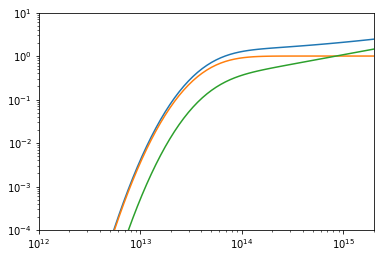

In [132]:
plt.ylim(1e-4,1e1)
plt.xlim(1e12,2e15)

plt.loglog(M,LRGc+LRGs)
plt.loglog(M,LRGc)
plt.loglog(M,LRGs)

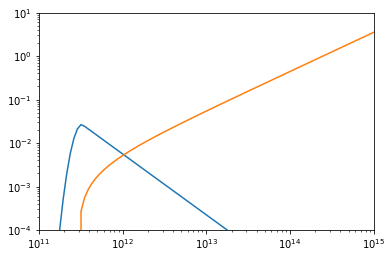

In [122]:
plt.ylim(1e-4,1e1)
plt.xlim(1e11,1e15)

plt.loglog(M,ELGc)
plt.loglog(M,ELGs)

(array([2075., 1597., 7548., 9012., 4090., 2169., 1278.,  824.,  524.,
         354.]),
 array([10000000000.0, 109000000000.0, 208000000000.0, 307000000000.0,
        406000000000.0, 505000000000.0, 604000000000.0, 703000000000.0,
        802000000000.0, 901000000000.0, 1000000000000.0], dtype=object),
 <BarContainer object of 10 artists>)

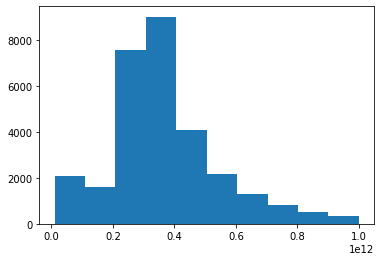

In [41]:
plt.hist(dfg.M200C,range=(1e10,1e12))

In [52]:
print(df.Rcom.min())
print(df.Rcom.max())

nan
nan


In [12]:
print(len(dfg.RA.values))

8911


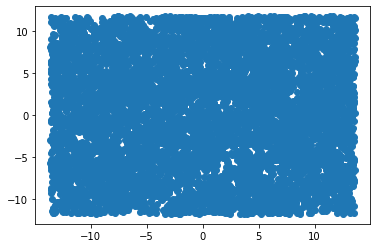

In [14]:
plt.scatter(dfg.RA.values,dfg.DEC.values)

In [ ]:
£columns_names = ['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']

dfg = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
#dfgC = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
#dfgS = pd.DataFrame(columns=['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C'])
cosmo= FlatLambdaCDM(Om0=0.3089,H0=100)
zmin = 0.6
zmax = 1.1
Dmin = cosmo.comoving_distance(zmin).value
Dmax = cosmo.comoving_distance(zmax).value

path = "/Volumes/LaCie/lightcone2_wide/"
files = os.listdir(path)

for i in range(15,16):
    print(files[i])
    
    dfgC= np.empty((1,12), dtype="object")
    dfgS= np.empty((1,12), dtype="object") 
   
    df = load_data(path+files[i])
    df = df[(df.M200C > 6e10)]
    dfm= df[df.PID == -1]
    dfs = df[df.PID != -1]
    dfm = dfm.rename(columns={"M200C": "M200P", "ID":"IDp"}) 
    dfm['M200C'] = dfm['M200P']
    dfm = dfm.drop(columns=['RS','PID','X','Y','Z'])
    dfs = dfs.drop(columns=['RS','X','Y','Z'])
    dfm2 = dfm.copy()
    dfm2 = dfm2.drop(columns=['RA','M200C','DEC','RVIR','Rcom','VX','VY','VZ','VMAX'])
    dfs = dfs.rename(columns={"PID":"IDp"})
    dft = dd.merge(dfm2,dfs,on="IDp")

    dft = dft.reset_index(drop=True)
    dfm = dfm.reset_index(drop=True)
    dfm['ID'] = dfm['IDp']


    dft = dft[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]
    dfm = dfm[['IDp','ID','RA','DEC','Rcom','VX','VY','VZ','VMAX','RVIR','M200P','M200C']]


SyntaxError: invalid character in identifier (249759936.py, line 1)

In [65]:
df = pd.read_parquet("/Volumes/LaCie/lightcone2_wide/dmsdens_1150.0.2.parquet")
df = df[(df.M200C > 1e11)]
df = df.reset_index(drop=True)

In [70]:
dfm = df[df.PID == 1]
dft = df[df.PID !=-1]

In [54]:
df.shape
x = np.zeros((df.shape[0],2,2))

In [55]:
df2 = df.sort_values(by=['PID','M200C'], inplace=True)

In [56]:
df['tavu'] = list(x)

In [57]:
df.loc[9473,'tavu'].dtype

dtype('float64')

In [68]:
df

,ID,RA,DEC,Rcom,X,Y,Z,VX,VY,VZ,VMAX,RVIR,RS,M200C,PID
0,2628400915,-13.318614,-11.612012,753.057129,717.804749,-169.928101,-151.577820,315.158173,-243.997757,-827.237122,92.820000,108.902000,7.595000,1.089000e+11,-1
1,2628399281,-13.270625,-11.436415,753.187622,718.520081,-169.462036,-149.342285,367.627777,-249.774475,-713.937439,97.070000,123.086998,18.965000,1.576200e+11,-1
2,2628398944,-13.578683,-11.735319,756.023865,719.530823,-173.789490,-153.768372,157.166306,-138.408401,-721.567139,100.949997,121.780998,12.729000,1.533700e+11,-1
3,2628402803,-13.348875,-11.759485,753.135742,717.407776,-170.234314,-153.491943,310.377716,-235.314301,-948.329224,94.699997,110.997002,10.236000,1.170700e+11,-1
4,2628401280,-13.523503,-11.573171,757.820068,721.828979,-173.609009,-152.033264,279.108429,-119.518784,-648.091675,96.519997,112.107002,8.806000,1.223000e+11,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702895,3735587379,13.293330,11.368653,897.964600,856.757507,202.423584,177.007690,38.463058,2.714841,-442.670044,113.610001,124.440002,10.239000,1.586000e+11,-1
702896,3735587862,13.406516,11.361981,897.780457,856.200378,204.078613,176.868896,81.325569,-48.397831,-469.738098,118.889999,138.300003,15.362000,2.263000e+11,-1
702897,3735581113,13.373571,11.261118,899.885559,858.627747,204.135498,175.730225,69.940224,5.597090,-568.506775,168.750000,202.343994,21.962999,6.939300e+11,-1
702898,3735585920,13.383243,11.314965,899.251770,857.827637,204.098267,176.435242,133.056137,-42.118977,-486.652100,112.589996,145.990005,28.240999,2.534400e+11,-1


In [10]:
df2 = df.groupby(['PID'])

In [14]:
df2.unique()

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [366]:
dftt.shape

(10093318, 12)

In [368]:
t = Table.from_pandas(dftt)
t.write('/Users/rpaviot/catalog_uchuu_for_fits', format='fits',overwrite=True)